# Práctica 1

## Integrantes

* Garcia Saavedra Armando
* Orozco Guillen Jorge David
* Rodriguez Nuñez Diego Eduardo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd

## Implementación del Mergesort

In [2]:
def merge(arr_i,arr_d):
    i=j=k=0
    arreglo = np.zeros(len(arr_i)+len(arr_d))
    while i < len(arr_i) and j < len(arr_d):
        if arr_i[i] < arr_d[j]:
            arreglo[k] = arr_i[i]
            i += 1
        else:
            arreglo[k] = arr_d[j]
            j += 1
        k += 1

    while i < len(arr_i):
        arreglo[k] = arr_i[i]
        i += 1
        k += 1

    while j < len(arr_d):
        arreglo[k] = arr_d[j]
        j += 1
        k += 1
    return arreglo

def sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid= len(arr) // 2
    arr_i = sort(arr[:mid])
    arr_d = sort(arr[mid:])

    return merge(arr_i,arr_d)

## Implementación del Quicksort

In [3]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivote = arr[0]
        mayor = []
        menor = []
        for i in range(1,len(arr)):
            if arr[i] < pivote:
                menor.append(arr[i])
            else:
                mayor.append(arr[i])
        return quicksort(menor)+[pivote]+quicksort(mayor)

## Comparación de tiempos

In [4]:
tams = [10,100,1000,10000,1000000,10000000,10000000,100000000]

mergesort_tiempos = []
quicksort_tiempos = []
numpysort_tiempos = []

for tam in tams:
    arr = np.random.randint(0,100000,tam)
    mergesort_tiempo = timeit.timeit('sort(arr)', number = 1, globals=globals())
    quicksort_tiempo = timeit.timeit('quicksort(arr)', number = 1, globals=globals())
    numpysort_tiempo = timeit.timeit('np.sort(arr)', number = 1, globals=globals())
    mergesort_tiempos.append(mergesort_tiempo)
    quicksort_tiempos.append(quicksort_tiempo)
    numpysort_tiempos.append(numpysort_tiempo)

In [6]:
mergesort_tiempos

[5.299999611452222e-05,
 0.00032729998929426074,
 0.004003500012913719,
 0.06762230000458658,
 7.339073599985568,
 87.2742798999825,
 88.99451089999638,
 1019.4821179000137]

In [7]:
quicksort_tiempos

[1.3699987903237343e-05,
 0.00010090001160278916,
 0.0017333000141661614,
 0.013709799997741356,
 2.9154058000131045,
 74.59632289997535,
 76.70600130001549,
 3742.3668113999884]

In [8]:
numpysort_tiempos

[3.29999893438071e-05,
 1.0399991879239678e-05,
 7.800001185387373e-05,
 0.00040079999598674476,
 0.05201870002201758,
 0.5499336999782827,
 0.585267600021325,
 5.981388299987884]

## Graficación de tiempos

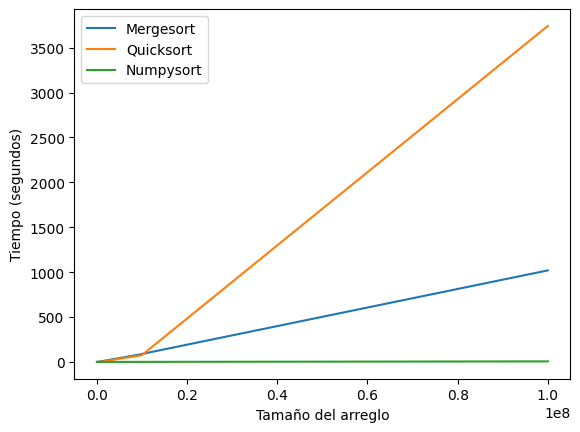

In [5]:
plt.plot(tams,mergesort_tiempos,label='Mergesort')
plt.plot(tams,quicksort_tiempos,label='Quicksort')
plt.plot(tams,numpysort_tiempos,label='Numpysort')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.show()

## Tabulación de tiempos

In [9]:
data = {
    'Tiempos Mergesort': mergesort_tiempos,
    'Tiempos Quicksort': quicksort_tiempos,
    'Tiempos Numpysort': numpysort_tiempos,
    'Tamaños de los arreglos': tams
}

df= pd.DataFrame(data)
df.set_index('Tamaños de los arreglos',inplace=True)
df

,Tiempos Mergesort,Tiempos Quicksort,Tiempos Numpysort
Tamaños de los arreglos,,,
10,0.000053,0.000014,0.000033
100,0.000327,0.000101,0.000010
1000,0.004004,0.001733,0.000078
10000,0.067622,0.013710,0.000401
1000000,7.339074,2.915406,0.052019
10000000,87.274280,74.596323,0.549934
10000000,88.994511,76.706001,0.585268
100000000,1019.482118,3742.366811,5.981388
